In [6]:
# FightOS - PCOS detection Using ultrasound images.

In [7]:
import tensorflow as tf

In [8]:
directory= 'dataset/train'

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [10]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


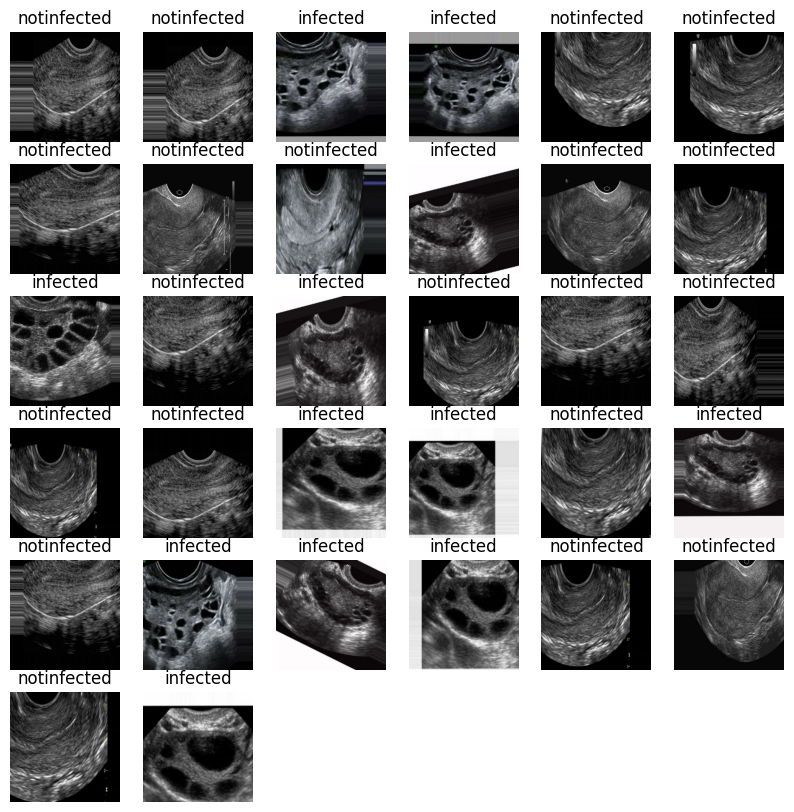

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

Augumentation


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.


Found 576 images belonging to 2 classes.


In [13]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

# Model 1

In [15]:
model1 = Sequential()
model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model1.add(Dense(2,activation='softmax'))

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 51, 51, 12)        3012      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 12)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1728)              0         
                                                                 
 dense (Dense)               (None, 2)                 3

In [17]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [18]:
history = model1.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 27s 2s/step - loss: 0.5716 - accuracy: 0.7337 - val_loss: 0.4281 - val_accuracy: 0.8229
Epoch 2/5
14/14 [==============================] - 25s 2s/step - loss: 0.3640 - accuracy: 0.8442 - val_loss: 0.3048 - val_accuracy: 0.8854
Epoch 3/5
14/14 [==============================] - 25s 2s/step - loss: 0.2436 - accuracy: 0.9028 - val_loss: 0.1784 - val_accuracy: 0.9462
Epoch 4/5
14/14 [==============================] - 25s 2s/step - loss: 0.1464 - accuracy: 0.9555 - val_loss: 0.1028 - val_accuracy: 0.9757
Epoch 5/5
14/14 [==============================] - 25s 2s/step - loss: 0.0777 - accuracy: 0.9777 - val_loss: 0.0661 - val_accuracy: 0.9826


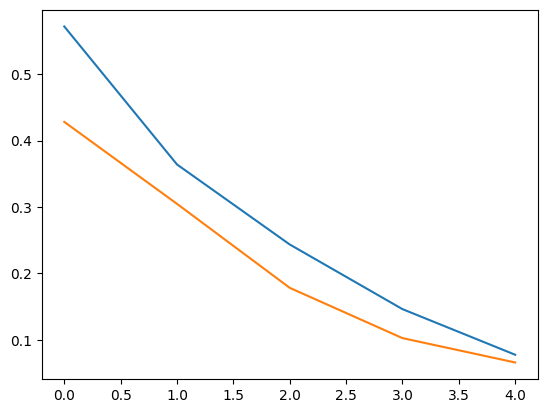

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 2 

final model

In [20]:
model2 = Sequential()
model2.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(6,6)))
model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(5,5)))
model2.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
# model2.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model2.add(Dense(2,activation='softmax'))

In [21]:
from tensorflow.keras.losses import CategoricalCrossentropy
model2.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [22]:
history = model2.fit( 
  train_it,
  validation_data=val_it,
  epochs=8)

Epoch 1/8
14/14 [==============================] - 28s 2s/step - loss: 0.6793 - accuracy: 0.6009 - val_loss: 0.6434 - val_accuracy: 0.6962
Epoch 2/8
14/14 [==============================] - 26s 2s/step - loss: 0.5856 - accuracy: 0.7708 - val_loss: 0.4886 - val_accuracy: 0.8438
Epoch 3/8
14/14 [==============================] - 26s 2s/step - loss: 0.3905 - accuracy: 0.8902 - val_loss: 0.2877 - val_accuracy: 0.9410
Epoch 4/8
14/14 [==============================] - 25s 2s/step - loss: 0.2399 - accuracy: 0.9303 - val_loss: 0.1881 - val_accuracy: 0.9566
Epoch 5/8
14/14 [==============================] - 25s 2s/step - loss: 0.1753 - accuracy: 0.9377 - val_loss: 0.1562 - val_accuracy: 0.9583
Epoch 6/8
14/14 [==============================] - 25s 2s/step - loss: 0.1213 - accuracy: 0.9607 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 7/8
14/14 [==============================] - 25s 2s/step - loss: 0.0917 - accuracy: 0.9726 - val_loss: 0.0829 - val_accuracy: 0.9792
Epoch 8/8
14/14 [==========

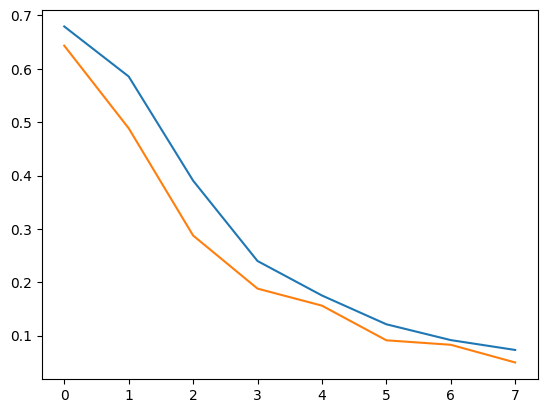

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 3


In [24]:
model3 = Sequential()
model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(2,activation='softmax'))

In [25]:
from tensorflow.keras.losses import CategoricalCrossentropy
model3.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [26]:
history = model3.fit( 
  train_it,
  validation_data=val_it,
  epochs=6)

Epoch 1/6
14/14 [==============================] - 27s 2s/step - loss: 0.6902 - accuracy: 0.5898 - val_loss: 0.6848 - val_accuracy: 0.6875
Epoch 2/6
14/14 [==============================] - 25s 2s/step - loss: 0.6777 - accuracy: 0.7329 - val_loss: 0.6619 - val_accuracy: 0.7049
Epoch 3/6
14/14 [==============================] - 25s 2s/step - loss: 0.6487 - accuracy: 0.6372 - val_loss: 0.6261 - val_accuracy: 0.7674
Epoch 4/6
14/14 [==============================] - 25s 2s/step - loss: 0.5904 - accuracy: 0.7292 - val_loss: 0.5461 - val_accuracy: 0.7222
Epoch 5/6
14/14 [==============================] - 25s 2s/step - loss: 0.5269 - accuracy: 0.7737 - val_loss: 0.4935 - val_accuracy: 0.8264
Epoch 6/6
14/14 [==============================] - 25s 2s/step - loss: 0.4417 - accuracy: 0.8516 - val_loss: 0.3754 - val_accuracy: 0.8785


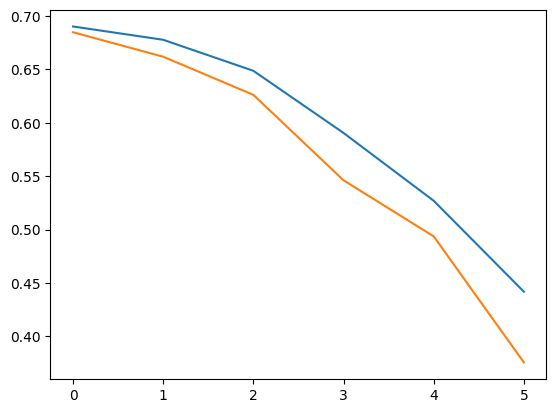

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 4

In [28]:
model4 = Sequential()
model4.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(3,3)))
model4.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model4.add(Dense(2,activation='softmax'))

In [29]:
from tensorflow.keras.losses import CategoricalCrossentropy
model4.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [30]:
history = model4.fit( 
  train_it,
  validation_data=val_it,
  epochs=10)

Epoch 1/10
14/14 [==============================] - 28s 2s/step - loss: 0.6438 - accuracy: 0.7018 - val_loss: 0.5826 - val_accuracy: 0.7552
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.5283 - accuracy: 0.7708 - val_loss: 0.4335 - val_accuracy: 0.8056
Epoch 3/10
14/14 [==============================] - 25s 2s/step - loss: 0.3546 - accuracy: 0.8806 - val_loss: 0.2557 - val_accuracy: 0.9167
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.1922 - accuracy: 0.9369 - val_loss: 0.1231 - val_accuracy: 0.9583
Epoch 5/10
14/14 [==============================] - 25s 2s/step - loss: 0.1006 - accuracy: 0.9718 - val_loss: 0.0898 - val_accuracy: 0.9688
Epoch 6/10
14/14 [==============================] - 25s 2s/step - loss: 0.0722 - accuracy: 0.9748 - val_loss: 0.0562 - val_accuracy: 0.9861
Epoch 7/10
14/14 [==============================] - 25s 2s/step - loss: 0.0530 - accuracy: 0.9822 - val_loss: 0.0571 - val_accuracy: 0.9792
Epoch 8/10
14/14 [==

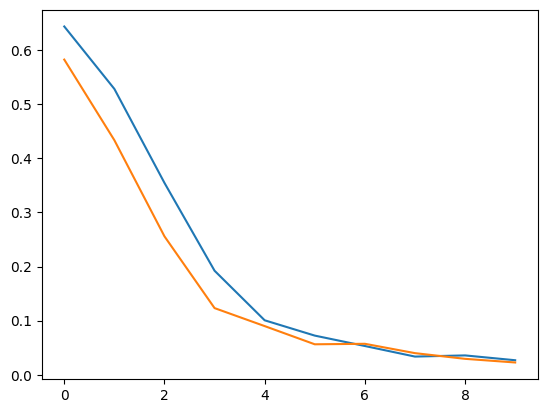

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Model 5

In [32]:
model5 = Sequential()
model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))
model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))
model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(2,activation='softmax'))

In [33]:
from tensorflow.keras.losses import CategoricalCrossentropy
model5.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [34]:
history = model5.fit( 
  train_it,
  validation_data=val_it,
  epochs=7)

Epoch 1/7
14/14 [==============================] - 25s 2s/step - loss: 0.6738 - accuracy: 0.6031 - val_loss: 0.6506 - val_accuracy: 0.6059
Epoch 2/7
14/14 [==============================] - 24s 2s/step - loss: 0.6127 - accuracy: 0.6958 - val_loss: 0.5512 - val_accuracy: 0.8212
Epoch 3/7
14/14 [==============================] - 23s 2s/step - loss: 0.4586 - accuracy: 0.8947 - val_loss: 0.3511 - val_accuracy: 0.9167
Epoch 4/7
14/14 [==============================] - 23s 2s/step - loss: 0.2571 - accuracy: 0.9414 - val_loss: 0.1809 - val_accuracy: 0.9497
Epoch 5/7
14/14 [==============================] - 23s 2s/step - loss: 0.1497 - accuracy: 0.9525 - val_loss: 0.1112 - val_accuracy: 0.9722
Epoch 6/7
14/14 [==============================] - 23s 2s/step - loss: 0.0958 - accuracy: 0.9681 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 7/7
14/14 [==============================] - 23s 2s/step - loss: 0.0652 - accuracy: 0.9859 - val_loss: 0.0654 - val_accuracy: 0.9774


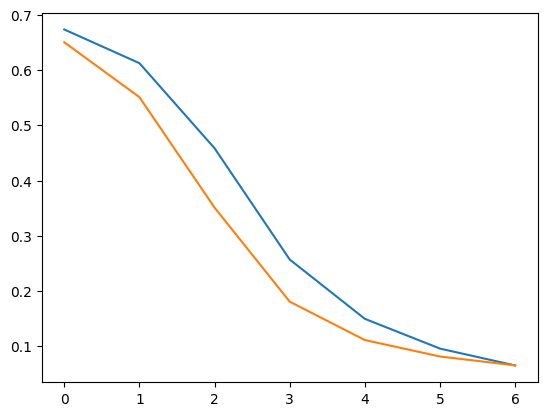

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Saving Model

In [36]:
model2.save('model.h5')

C:\Users\Charu Gupta\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

In [38]:

from keras.preprocessing.image import load_img
image = load_img('../input/pcos-detection-using-ultrasound-images/data/test/infected/img1.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

FileNotFoundError: [Errno 2] No such file or directory: '../input/pcos-detection-using-ultrasound-images/data/test/infected/img1.jpg'

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
print(prediction)

[[0.64568764 0.35431233]]


In [ ]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"
#label[0][1]

In [ ]:
j=prediction.max()
get_key(j)

'infected'